In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [4]:
df = pd.read_csv('/content/drive/MyDrive/TaxiFare.csv')

# New Section

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
df1 = df.copy()

In [8]:
df1.drop('unique_id',axis=1,inplace=True)

In [9]:
df1.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [10]:
df1.columns = ['amount','pickup_date','pickup_long','pickup_lat','dropoff_long','dropoff_lat','pass_no']

In [11]:
df1

,amount,pickup_date,pickup_long,pickup_lat,dropoff_long,dropoff_lat,pass_no
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [12]:
df1 = df1[df1['amount']>0]

In [13]:
df1

,amount,pickup_date,pickup_long,pickup_lat,dropoff_long,dropoff_lat,pass_no
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [14]:
df1 = df1[df1['pass_no']!=0]

In [15]:
df1

,amount,pickup_date,pickup_long,pickup_lat,dropoff_long,dropoff_lat,pass_no
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49826 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   amount        49826 non-null  float64
 1   pickup_date   49826 non-null  object 
 2   pickup_long   49826 non-null  float64
 3   pickup_lat    49826 non-null  float64
 4   dropoff_long  49826 non-null  float64
 5   dropoff_lat   49826 non-null  float64
 6   pass_no       49826 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ MB


In [17]:
df1['pickup_date'] = pd.to_datetime(df1['pickup_date'])

<ipython-input-17-8a0e96a0b040>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pickup_date'] = pd.to_datetime(df1['pickup_date'])


In [18]:
df1['year'] = df1['pickup_date'].dt.year

<ipython-input-18-22cb7aa90e52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = df1['pickup_date'].dt.year


In [19]:
df1['month'] = df1['pickup_date'].dt.month

<ipython-input-19-29c2fa5f315a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1['pickup_date'].dt.month


In [20]:
df1['date'] = df1['pickup_date'].dt.day

<ipython-input-20-624f0bed9f09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = df1['pickup_date'].dt.day


In [21]:
df1['day'] = df1['pickup_date'].dt.day_name()

<ipython-input-21-07674e1bc03d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day'] = df1['pickup_date'].dt.day_name()


In [22]:
df1['Quarter'] = df1['pickup_date'].dt.quarter

<ipython-input-22-0451ba3a129f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Quarter'] = df1['pickup_date'].dt.quarter


In [23]:
df1['hour'] = df1['pickup_date'].dt.hour

<ipython-input-23-3f978fd2013e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hour'] = df1['pickup_date'].dt.hour


In [24]:
df1.columns

Index(['amount', 'pickup_date', 'pickup_long', 'pickup_lat', 'dropoff_long',
       'dropoff_lat', 'pass_no', 'year', 'month', 'date', 'day', 'Quarter',
       'hour'],
      dtype='object')

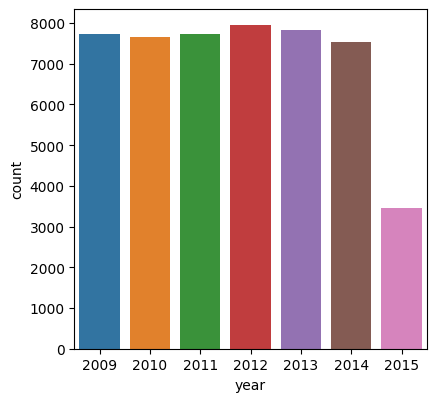

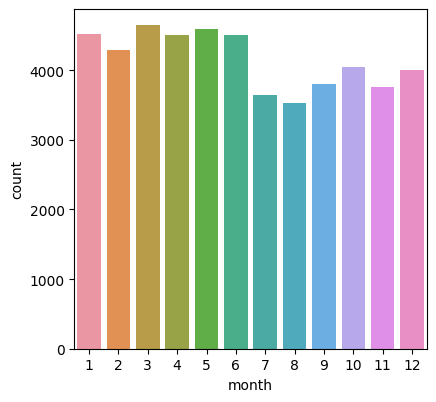

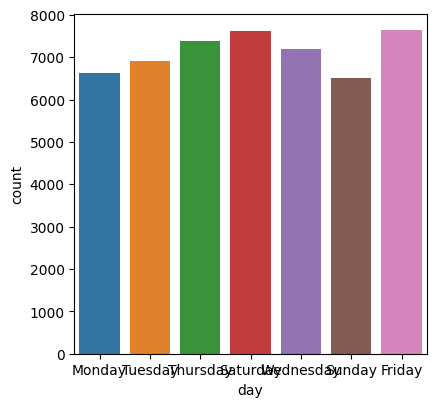

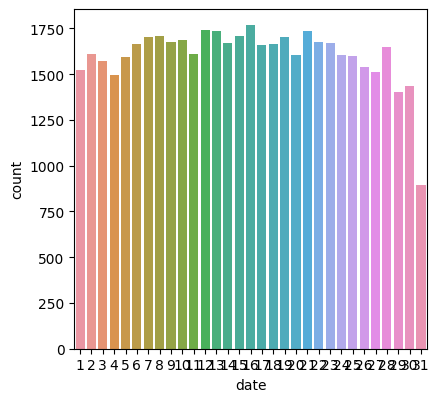

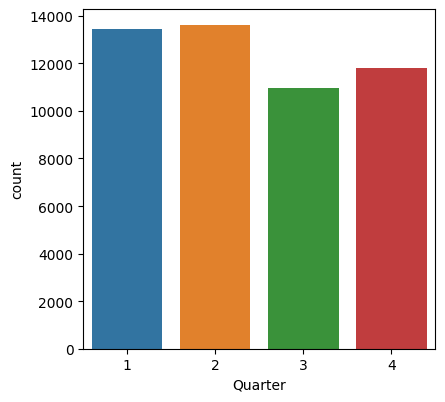

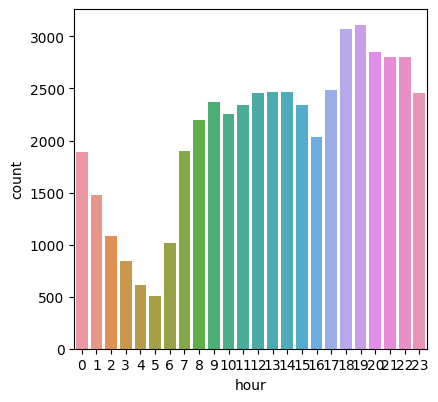

In [25]:
cols = ['year', 'month', 'day', 'date', 'Quarter','hour']
for i in range(len(cols)):
    plt.figure(figsize=(10,15))
    plt.subplot(3,2,i+1)
    sns.countplot(data=df1,x=cols[i])
plt.show()

In [26]:
def hour_demand(x):
    if x>=0 and x<=6:
        return 1
    elif x>=7 and x<=17:
        return 2
    else:
        return 3

In [27]:
df1['hour'] = df1['hour'].apply(hour_demand)

<ipython-input-27-b7edd8819064>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hour'] = df1['hour'].apply(hour_demand)


In [28]:
df1

,amount,pickup_date,pickup_long,pickup_lat,dropoff_long,dropoff_lat,pass_no,year,month,date,day,Quarter,hour
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,Monday,2,2
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,Tuesday,1,2
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,Thursday,3,1
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,Saturday,2,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,Tuesday,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,Wednesday,2,3
49996,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,Monday,2,2
49997,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,Sunday,1,1
49998,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,Tuesday,4,2


In [29]:
df1['Quarter'] = np.where(((df1['Quarter']==1) | (df1['Quarter']==2)),1,0)

<ipython-input-29-ee00149b99d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Quarter'] = np.where(((df1['Quarter']==1) | (df1['Quarter']==2)),1,0)


In [30]:
def day_bin(x):
    if x>=1 and x<=10:
        return 2
    elif x>=11 and x<=20:
        return 3
    elif x>=21 and x<=31:
        return 1

In [31]:
df1['date'] = df1['date'].apply(day_bin)

<ipython-input-31-a1a1115f1128>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = df1['date'].apply(day_bin)


In [32]:
df1['day'] = np.where(df1['day'].isin(['Friday','Saturday','Sunday']),2,1)

<ipython-input-32-77a2fdc128ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day'] = np.where(df1['day'].isin(['Friday','Saturday','Sunday']),2,1)


In [33]:
df1['month'] = np.where(df1['month'].isin([1,2,3,4,5,6]),2,1)

<ipython-input-33-a347574e9b76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = np.where(df1['month'].isin([1,2,3,4,5,6]),2,1)


In [34]:
df1

,amount,pickup_date,pickup_long,pickup_lat,dropoff_long,dropoff_lat,pass_no,year,month,date,day,Quarter,hour
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,3,1,1,2
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,2,2,1,1,2
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,1,3,1,0,1
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,1,2,1,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,2,3,1,1,3
49996,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,2,1,1,1,2
49997,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,2,1,2,1,1
49998,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,1,2,1,0,2


In [35]:
df1 = pd.get_dummies(data=df1,columns=['year'],drop_first=True,dtype=int)

In [36]:
df1

,amount,pickup_date,pickup_long,pickup_lat,dropoff_long,dropoff_lat,pass_no,month,date,day,Quarter,hour,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2,3,1,1,2,0,0,0,0,0,0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2,2,1,1,2,1,0,0,0,0,0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1,3,1,0,1,0,1,0,0,0,0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2,1,2,1,1,0,0,1,0,0,0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2,2,1,1,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2,3,1,1,3,0,0,0,1,0,0
49996,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2,1,1,1,2,0,0,0,0,0,1
49997,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2,1,2,1,1,0,1,0,0,0,0
49998,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,1,2,1,0,2,0,0,1,0,0,0


In [37]:
def haversine_dist(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2*np.arctan(np.sqrt(a),np.sqrt(1-a))
    km = 6378 * c
    return km

In [38]:
df1['km'] = haversine_dist(df1['pickup_long'],df1['pickup_lat'],df1['dropoff_long'],df1['dropoff_lat'])

In [39]:
df1

,amount,pickup_date,pickup_long,pickup_lat,dropoff_long,dropoff_lat,pass_no,month,date,day,Quarter,hour,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,km
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2,3,1,1,2,0,0,0,0,0,0,1.031896
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2,2,1,1,2,1,0,0,0,0,0,8.459416
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1,3,1,0,1,0,1,0,0,0,0,1.391052
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2,1,2,1,1,0,0,1,0,0,0,2.802346
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2,2,1,1,2,1,0,0,0,0,0,2.001353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2,3,1,1,3,0,0,0,1,0,0,4.945802
49996,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2,1,1,1,2,0,0,0,0,0,1,0.875667
49997,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2,1,2,1,1,0,1,0,0,0,0,2.265773
49998,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,1,2,1,0,2,0,0,1,0,0,0,0.665976


In [40]:
df1.columns

Index(['amount', 'pickup_date', 'pickup_long', 'pickup_lat', 'dropoff_long',
       'dropoff_lat', 'pass_no', 'month', 'date', 'day', 'Quarter', 'hour',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015', 'km'],
      dtype='object')

In [41]:
df1.drop(columns=['pickup_date', 'pickup_long', 'pickup_lat', 'dropoff_long',
       'dropoff_lat'],axis=1,inplace=True)

In [42]:
x = df1.drop('amount',axis=1)

In [43]:
y = np.sqrt(df1['amount'])

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=50)

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
lr.score(x_train,y_train)

0.025364333354989443

In [48]:
lr.score(x_test,y_test)

0.019584019138897957

In [49]:
dt=DecisionTreeRegressor()

In [50]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [51]:
dt.score(x_train,y_train)

0.972696592297323

In [52]:
dt.score(x_test,y_test)

0.5624689639374508

In [57]:
params = {'criterion':['squared_error'],
          'max_depth':[2,5,8,15,18],
          'min_samples_leaf':[2,5,8,12,18,20],
          'min_samples_split':[10,20,35,75,125,150,175]}

grid_search = RandomizedSearchCV(estimator=dt,param_distributions=params,n_jobs=-1,cv=10)

In [58]:
grid_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [2, 5, 8, 15, 18],
                                        'min_samples_leaf': [2, 5, 8, 12, 18,
                                                             20],
                                        'min_samples_split': [10, 20, 35, 75,
                                                              125, 150, 175]})

In [59]:
grid_search.best_score_

0.7700096799166698

In [60]:
best = grid_search.best_params_

In [61]:
dtr1 = DecisionTreeRegressor(**best)

In [62]:
dtr1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=20, min_samples_split=75)

In [63]:
dtr1.score(x_train,y_train)

0.7841273509462969

In [64]:
dtr1.score(x_test,y_test)

0.7679953222332219

In [65]:
rf=RandomForestRegressor()

In [66]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [67]:
rf.score(x_train,y_train)

0.9428815742397946

In [68]:
rf.score(x_test,y_test)

0.7360901949197493

In [69]:
rf_params = {'criterion':['squared_error'],
          'max_depth':[2,5,8,12,15,18,20],
          'min_samples_leaf':[2,5,8,12,15,18,20],
          'min_samples_split':[10,20,35,50,75,100,125,150,175],
          'bootstrap':[True],
          'max_features':['log2','sqrt'],
          'max_samples':[0.7,0.75],
          'n_estimators':[50,100,150,200]}


In [70]:
rf_search = RandomizedSearchCV(estimator=rf,cv=10,n_jobs=-1,param_distributions=rf_params)

In [71]:
rf_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['squared_error'],
                                        'max_depth': [2, 5, 8, 12, 15, 18, 20],
                                        'max_features': ['log2', 'sqrt'],
                                        'max_samples': [0.7, 0.75],
                                        'min_samples_leaf': [2, 5, 8, 12, 15,
                                                             18, 20],
                                        'min_samples_split': [10, 20, 35, 50,
                                                              75, 100, 125, 150,
                                                              175],
                                        'n_estimators': [50, 100, 150, 200]})

In [72]:
rf_search.best_score_

0.7445129425472404

In [73]:
best1 = rf_search.best_params_

In [74]:
rf1 = RandomForestRegressor(**best1)

In [75]:
rf1.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features='log2', max_samples=0.75,
                      min_samples_leaf=8, min_samples_split=10,
                      n_estimators=50)

In [76]:
rf1.score(x_train,y_train)

0.7804027160834548

In [77]:
rf1.score(x_test,y_test)

0.7463853592495803

In [82]:
from sklearn.ensemble import BaggingRegressor

In [84]:
bag = BaggingRegressor(estimator=dtr1,n_estimators=100)

In [85]:
bag.fit(x_train,y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=8,
                                                 min_samples_leaf=20,
                                                 min_samples_split=75),
                 n_estimators=100)

In [86]:
bag.score(x_train,y_train)

0.7877795139421178

In [87]:
bag.score(x_test,y_test)

0.7764128112149002